# Einlesen der Daten und erster Überblick

In [1]:
import pandas as pd
daten = pd.read_csv('d28.csv')  

In [2]:
daten.head()

,Name,Energie,Fett,FS,Kohlenhydrate,Zucker,Eiweiss,Salz,Label
0,Apfel,52,0.2,0.0,13.8,11.0,0.3,0.0,1
1,Banane,95,0.3,0.1,21.0,12.0,1.1,0.1,1
2,Haselnussschnitte,542,31.9,18.6,54.0,42.6,7.6,0.4,0
3,Gummibärchen,343,0.1,0.1,77.0,46.0,6.9,0.1,0
4,Chips,503,28.0,2.6,53.0,2.9,6.3,2.8,0


# Entscheidungsbaum mit allen Daten für ersten Überblick

### Wähle alle Attribute für Entscheidungsbaum

In [3]:
attribute = daten.columns.drop('Name').drop('Label')
attribute

Index(['Energie', 'Fett', 'FS', 'Kohlenhydrate', 'Zucker', 'Eiweiss', 'Salz'], dtype='object')

### Erstelle Baum

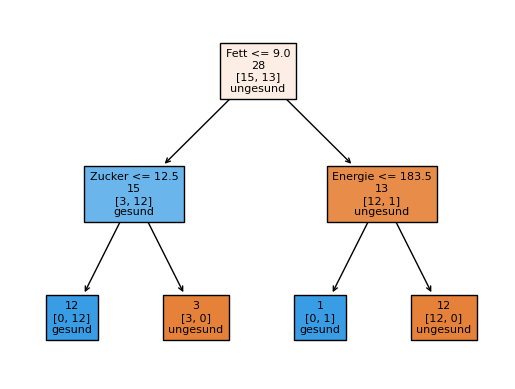

In [4]:
import sklearn.tree
import matplotlib
baum = sklearn.tree.DecisionTreeClassifier( random_state=0, max_depth=5)
baum.fit( daten[attribute], daten["Label"] )
sklearn.tree.plot_tree( baum, feature_names=attribute, label=None, 
                        filled=True,
                        class_names=["ungesund","gesund"], impurity=False,
                        proportion=False, fontsize=8 )
matplotlib.pyplot.show()

### Wichtigkeit der Attribute für den Baum


In [5]:
attribute

Index(['Energie', 'Fett', 'FS', 'Kohlenhydrate', 'Zucker', 'Eiweiss', 'Salz'], dtype='object')

In [6]:
baum.feature_importances_

array([0.13254438, 0.52284024, 0.        , 0.        , 0.34461538,
       0.        , 0.        ])

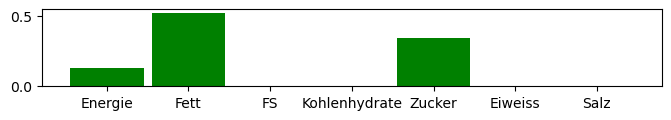

In [7]:
import matplotlib.pyplot as plt
import numpy as np
index = np.arange(len(attribute))
bar_width = 0.9
fig = plt.figure()
plt.bar(index, baum.feature_importances_, bar_width,  color="green")
plt.xticks(index, attribute) # labels get centered
fig.set_figheight(1)
fig.set_figwidth(8)
plt.show()

# Wähle wichtige Attribute für das Training

In [8]:
attribute = ['Fett','Zucker', 'Energie']

# Split in Traings- und Testdaten

In [9]:
len(daten)

28

In [10]:
anzahl_training = 20

In [11]:
import random
rand_ind = list(range(len(daten)))
random.shuffle( rand_ind )
print( rand_ind )

[0, 26, 5, 7, 15, 6, 8, 17, 12, 14, 21, 3, 9, 11, 1, 16, 2, 27, 4, 10, 18, 24, 19, 22, 20, 13, 23, 25]


In [12]:
training_ind = rand_ind[0:anzahl_training]
test_ind     = rand_ind[anzahl_training:28]
daten_training = daten.loc[training_ind] 
daten_test     = daten.loc[test_ind] 

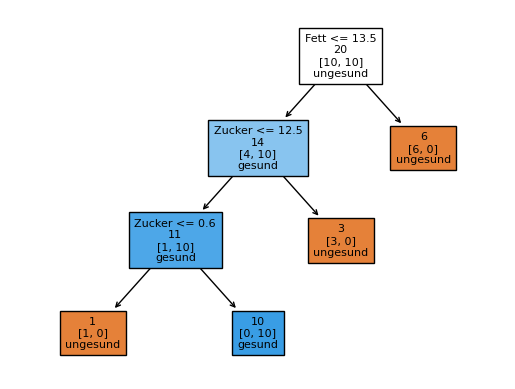

In [13]:
baum = sklearn.tree.DecisionTreeClassifier( random_state=0, max_depth=3)
baum.fit( daten_training[attribute], daten_training['Label'] )
sklearn.tree.plot_tree( baum, feature_names=attribute, label=None, 
                        filled=True,
                        class_names=["ungesund","gesund"], impurity=False,
                        proportion=False, fontsize=8 )
matplotlib.pyplot.show()

# Berechne Klassifikation der Testdaten

In [14]:
pred = baum.predict( daten_test[attribute] )
pred

array([1, 0, 0, 1, 0, 0, 0, 0])

In [15]:
import numpy as np
np.array( daten_test['Label'] )

array([1, 0, 0, 1, 0, 0, 0, 1])

In [16]:
pred == np.array( daten_test['Label'] )

array([ True,  True,  True,  True,  True,  True,  True, False])

In [17]:
np.count_nonzero( (pred == np.array( daten_test['Label'])) == True )

7

In [18]:
categorized_correct = 0
for i in daten_test.index:
    if( baum.predict(daten_test.loc[[i]][attribute]) == (daten_test.loc[i]['Label']) ):
        categorized_correct += 1
    else:
        print("falsch klassifiziert: ", i, daten_test.loc[i]['Name'])
print( "Anzahl  korrekt klassifiziert: ", categorized_correct )    
print( "Prozent korrekt klassifiziert: ", categorized_correct/len(daten_test)*100, "%")
print( "Anzahl  falsch klassifiziert: ", len(daten_test) - categorized_correct )    
print( "Prozent falsch klassifiziert: ", (len(daten_test) - categorized_correct)/len(daten_test)*100, "%")

falsch klassifiziert:  25 Putenbrustfilet (gebraten)
Anzahl  korrekt klassifiziert:  7
Prozent korrekt klassifiziert:  87.5 %
Anzahl  falsch klassifiziert:  1
Prozent falsch klassifiziert:  12.5 %
